## Unsupervised Transformations for Data Exploration and Visualization:
    -  Principle Component Analysis (PCA)
    -  Non-negative Matrix Factorization (NMF)
    -  t-SNE manifold learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:/Users/rhash/Documents/Datasets/Loan prediction/train_loanPrediction.csv')

df.drop('Loan_ID', axis=1, inplace=True)

df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
df_selected=df[['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome' ,'Property_Area', 'Loan_Status']]

#df_selected['LoanAmount'].fillna(value=df['LoanAmount'].median(), inplace=True)

df_selected.dropna( axis=0, inplace=True)
df_selected.shape

(543, 6)

In [4]:
# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

#for i in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status' ]:
#    encode_text_index(df, i)

for i in ['Property_Area', 'Loan_Status' ]:
    encode_text_index(df_selected, i)
df_selected.head(3)

,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome,Property_Area,Loan_Status
1,1.0,4583,128.0,1508.0,0,0
2,1.0,3000,66.0,0.0,2,1
3,1.0,2583,120.0,2358.0,2,1


In [5]:
df_selected.shape

(543, 6)

In [6]:
# Removes outliers (all rows) by one of Z-score, MAD or IQR-based approaches: 
def remove_outliers(df, name, thresh=3, method="Z_Score"):
    L=[]
    for name in name:
        
        if method=="Z_Score":
            drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (thresh * df[name].std()))]
              
        elif method=="MAD":
            median = np.median(df[name], axis=0)
            mad = np.median(np.abs(df[name] - median), axis=0)
            modified_z_score = 0.6745 * (df[name]-median) / mad
            drop_rows = df.index[modified_z_score >= 3.5]

        elif method=="IQR":
            quartile_1, quartile_3 = np.percentile(df[name], [25, 75])
            iqr = np.abs(quartile_3 - quartile_1)
            lower_bound = quartile_1 - (iqr * 1.5)
            upper_bound = quartile_3 + (iqr * 1.5)
            drop_rows = df.index[(df[name] > upper_bound) | (df[name] < lower_bound)]
        
        L.extend(list(drop_rows))
        
    df.drop(np.array(list(set(L))), axis=0, inplace=True)
    
remove_outliers(df_selected, ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], thresh=3)

In [7]:
X=df_selected.drop(['Loan_Status', 'Property_Area'], axis=1)
y=df_selected['Loan_Status']

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler=StandardScaler()
#scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [9]:
# PCA: _________________
from sklearn.decomposition import PCA 

pca=PCA(n_components=4, whiten=True, random_state=42)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)

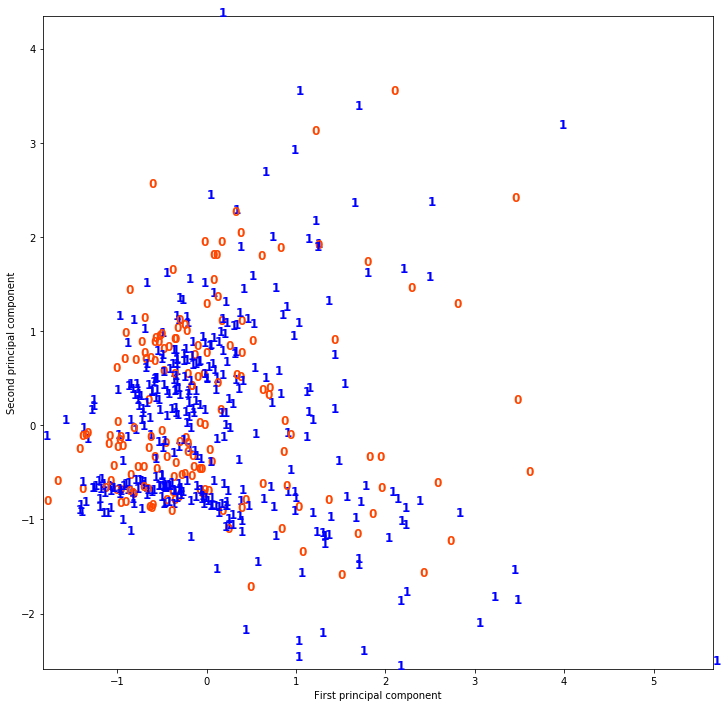

In [10]:
colors = ["orangered", "blue"] 
plt.figure(figsize=(12, 12)) 
plt.xlim(X_pca[:, 0].min(), X_pca[:, 0].max()) 
plt.ylim(X_pca[:, 1].min(), X_pca[:, 1].max()) 

for i in range(len(X_scaled)):    
    # actually plot the digits as text instead of using scatter    
    plt.text(X_pca[i, 0], X_pca[i, 1], str(np.array(y)[i]), color = colors[np.array(y)[i]],  fontdict={'weight': 'bold', 'size': 12}) 
    plt.xlabel("First principal component") 
    plt.ylabel("Second principal component") 

In [17]:
df_pca=pd.DataFrame(np.hstack([X_pca, pd.DataFrame(y)]))
df_pca.columns=['PC1', 'PC2', 'PC3', 'PC4', 'Loan_Status']

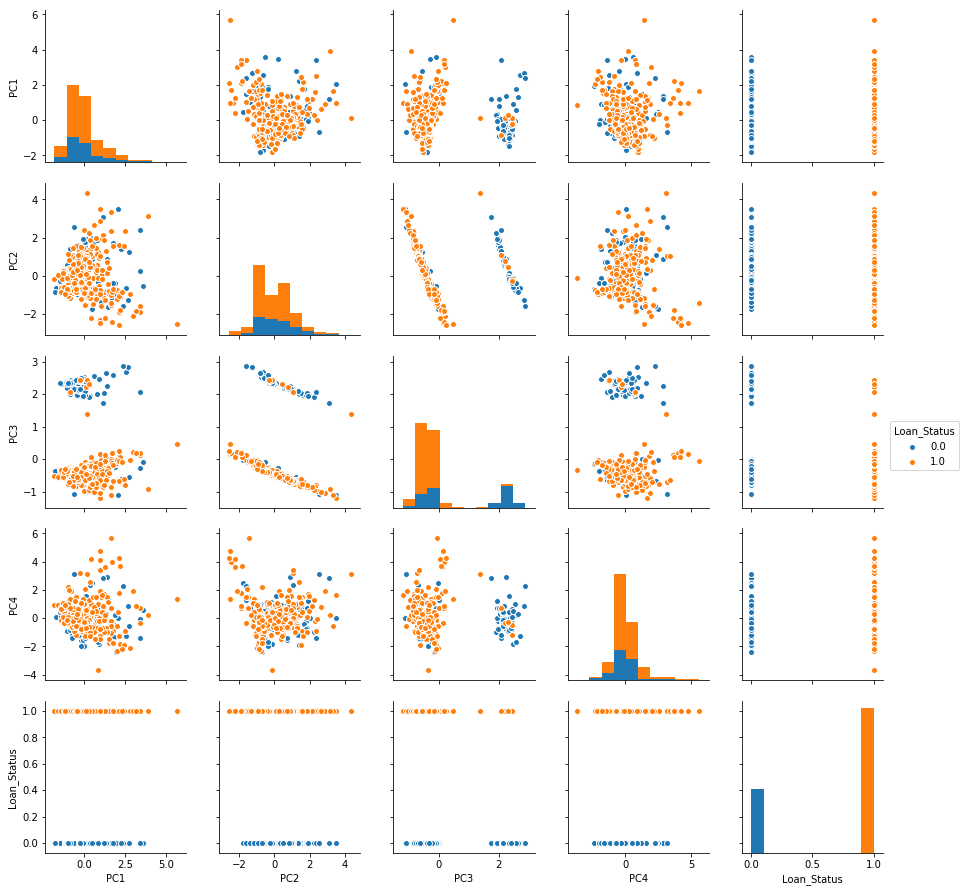

In [18]:
sns.pairplot(df_pca, hue='Loan_Status')

In [13]:
X_back=pca.inverse_transform(X_pca)

In [14]:
# Manifold Learning with t-SNE ____________________________________________________
from sklearn.manifold import TSNE 
tsne = TSNE(random_state=42) 

scaler=MinMaxScaler()
#scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# use fit_transform instead of fit, as TSNE has no transform method 
X_tsne = tsne.fit_transform(X_scaled)

In [15]:
X_tsne.shape

(522, 2)

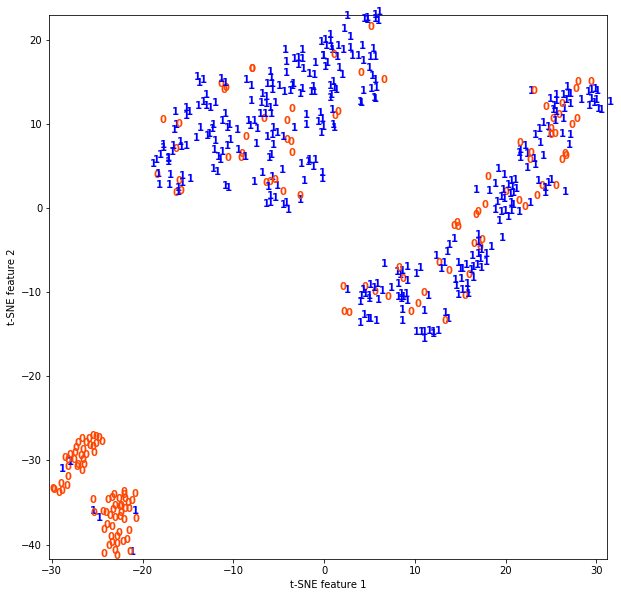

In [16]:
colors = ["orangered", "blue"] 
plt.figure(figsize=(10, 10)) 
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max()) 
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max()) 

for i in range(len(X_scaled)):    
    # actually plot the digits as text instead of using scatter    
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(np.array(y)[i]), color = colors[np.array(y)[i]],  fontdict={'weight': 'bold', 'size': 10}) 
    plt.xlabel("t-SNE feature 1") 
    plt.ylabel("t-SNE feature 2") 